In [1]:
import pandas as pd
from matplotlib import pyplot as py
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [2]:
df = pd.read_excel("premiums_young_with_gr.xlsx")
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


In [3]:
df.shape

(20096, 14)

In [4]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount', 'Genetical_Risk'],
      dtype='object')

In [5]:
df.columns = df.columns.str.replace(" ","_").str.lower()
df.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4


In [6]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

### Handle NA Value

In [7]:
df.dropna(inplace=True)
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [8]:
df.shape

(20090, 14)

In [9]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267,2.503932
std,2.294052,0.940713,23.420493,2749.906347,1.710203
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


In [11]:
df[df["number_of_dependants"]<0]["number_of_dependants"].unique()

array([-3, -1])

In [12]:
df["number_of_dependants"] = abs(df["number_of_dependants"])
df["number_of_dependants"].describe()

count    20090.000000
mean         0.722598
std          0.937200
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: number_of_dependants, dtype: float64

In [13]:
numeric_columns = df.select_dtypes(['float64','int64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

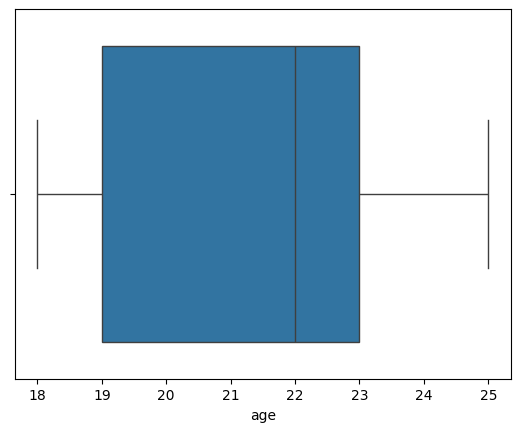

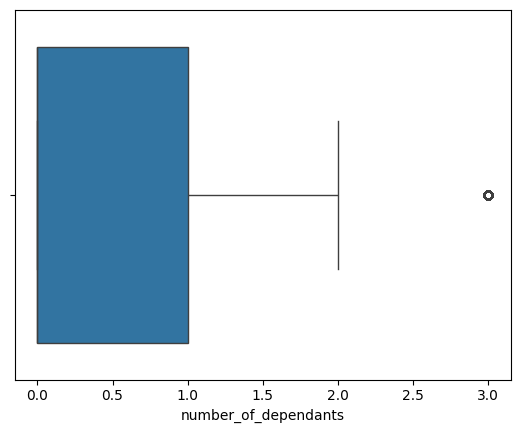

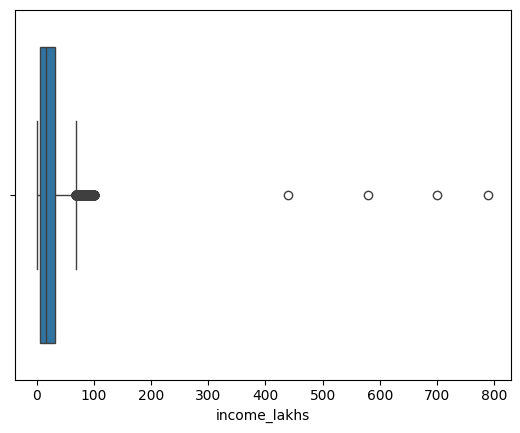

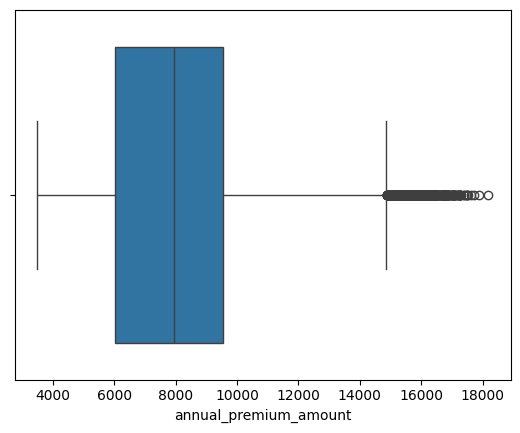

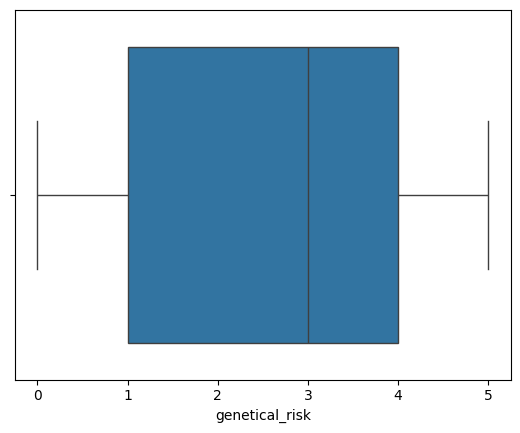

In [14]:
for col in numeric_columns:
    sns.boxplot(x=df[col])
    py.show()

In [15]:
df[df.age>100].shape

(0, 14)

In [16]:
df[df.age>100]["age"].unique()

array([], dtype=int64)

In [17]:
df1 = df[df.age<=100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267,2.503932
std,2.294052,0.937200,23.420493,2749.906347,1.710203
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


In [18]:
df.income_lakhs.quantile([0.25,0.75])

0.25     6.0
0.75    31.0
Name: income_lakhs, dtype: float64

In [19]:
def get_iqr_bonds(col1):
    Q1,Q3 = df.income_lakhs.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5* IQR
    return lower_bound,upper_bound

In [20]:
quantile_threshold = df1.income_lakhs.quantile(0.999)
quantile_threshold

np.float64(100.0)

In [21]:
df2 = df1[df1.income_lakhs<=quantile_threshold].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,21.494474,0.722742,22.390371,8141.799263,2.503883
std,2.294248,0.937238,21.732062,2749.912486,1.710184
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.000000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,100.000000,18186.000000,5.000000


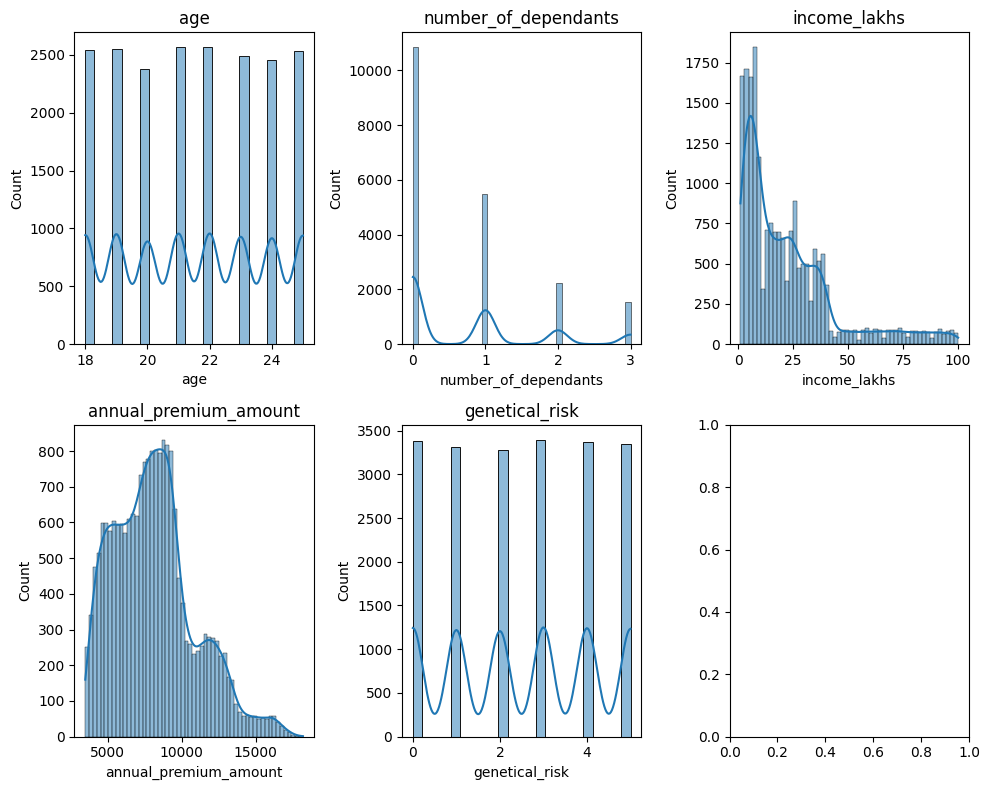

In [22]:
fig,axs = py.subplots(nrows=2,ncols=3,figsize=(10,8))

for i,col in enumerate(numeric_columns):
    ax = axs[i//3,i%3]
    sns.histplot(df2[col],kde=True,ax=ax)
    ax.set_title(col)

py.tight_layout()
py.show()

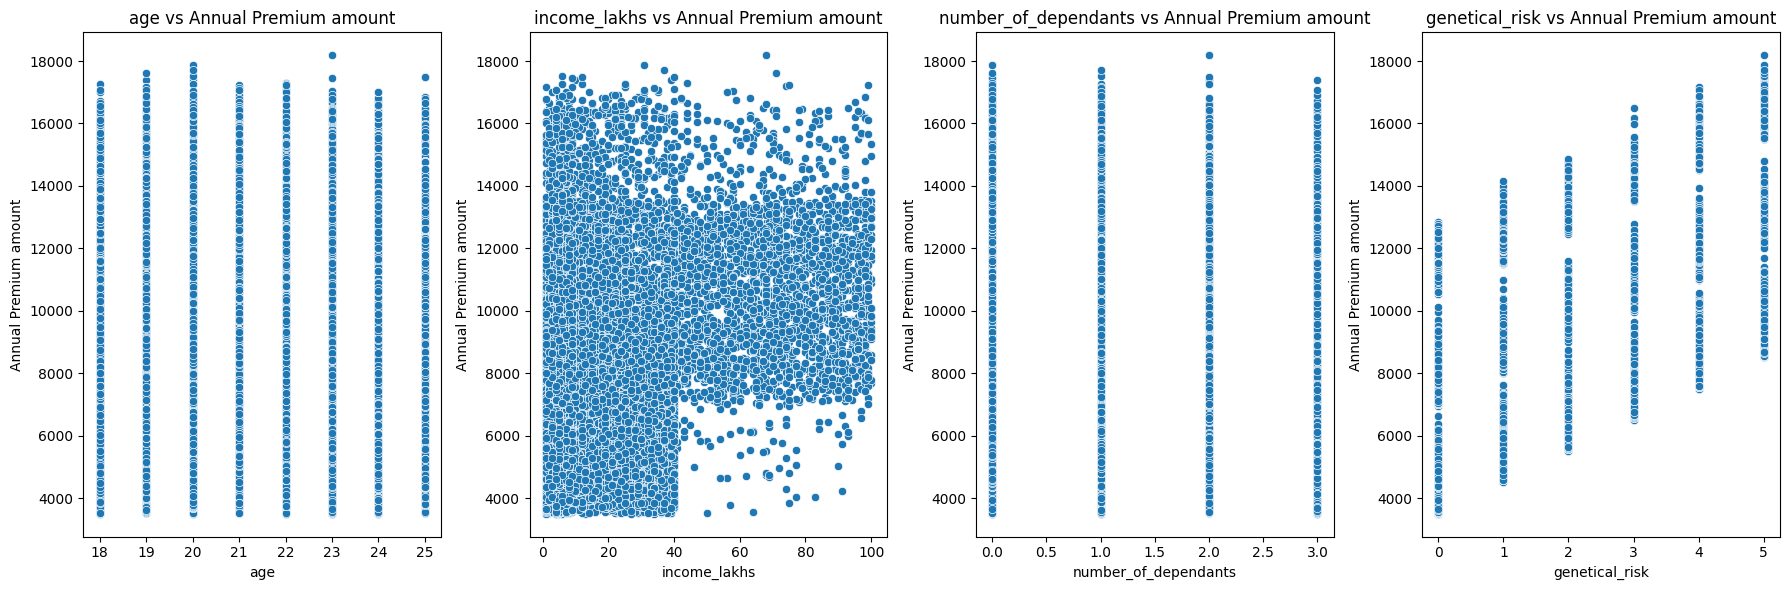

In [23]:
numeric_features = ["age","income_lakhs","number_of_dependants","genetical_risk"]

fig,axes = py.subplots(1,len(numeric_features),figsize=(18,6))

for ax,column in zip(axes,numeric_features):
    sns.scatterplot(x=df2[column],y=df2["annual_premium_amount"],ax=ax)
    ax.set_title(f"{column} vs Annual Premium amount")
    ax.set_xlabel(column)
    ax.set_ylabel("Annual Premium amount")

py.tight_layout()
py.show()

In [24]:
categorical_columns = ["gender","region","marital_status","bmi_category","smoking_status","employment_status","income_level"
                      ,"medical_history","insurance_plan"]
for col in categorical_columns:
    print(col,":",df2[col].unique())

gender : ['Male' 'Female']
region : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status : ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
income_level : ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history : ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan : ['Silver' 'Bronze' 'Gold']


In [25]:
df2["smoking_status"].replace({
    'Smoking=0':"No Smoking",
    "Not Smoking":'No Smoking',
    "Does Not Smoke":"No Smoking"
},inplace=True)

df2["smoking_status"].unique()

C:\Users\91999\AppData\Local\Temp\ipykernel_26620\2825346143.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2["smoking_status"].replace({


array(['Regular', 'No Smoking', 'Occasional'], dtype=object)

In [26]:
categorical_columns = ["gender","region","marital_status","bmi_category","smoking_status","employment_status","income_level"
                      ,"medical_history","insurance_plan"]
for col in categorical_columns:
    print(col,":",df2[col].unique())

gender : ['Male' 'Female']
region : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status : ['Regular' 'No Smoking' 'Occasional']
employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
income_level : ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history : ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan : ['Silver' 'Bronze' 'Gold']


In [27]:
pct_count = df2["gender"].value_counts(normalize=True)
pct_count

gender
Male      0.550383
Female    0.449617
Name: proportion, dtype: float64

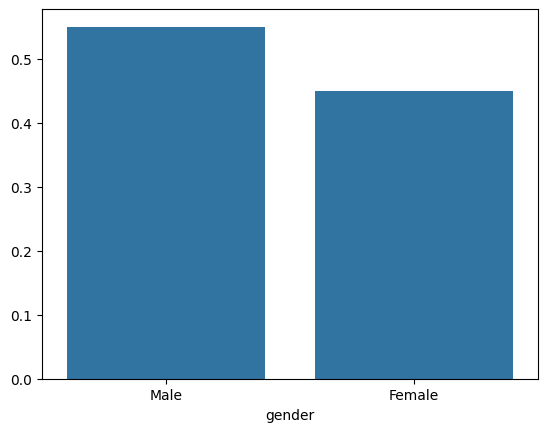

In [28]:
sns.barplot(x=pct_count.index,y=pct_count.values)
py.show()

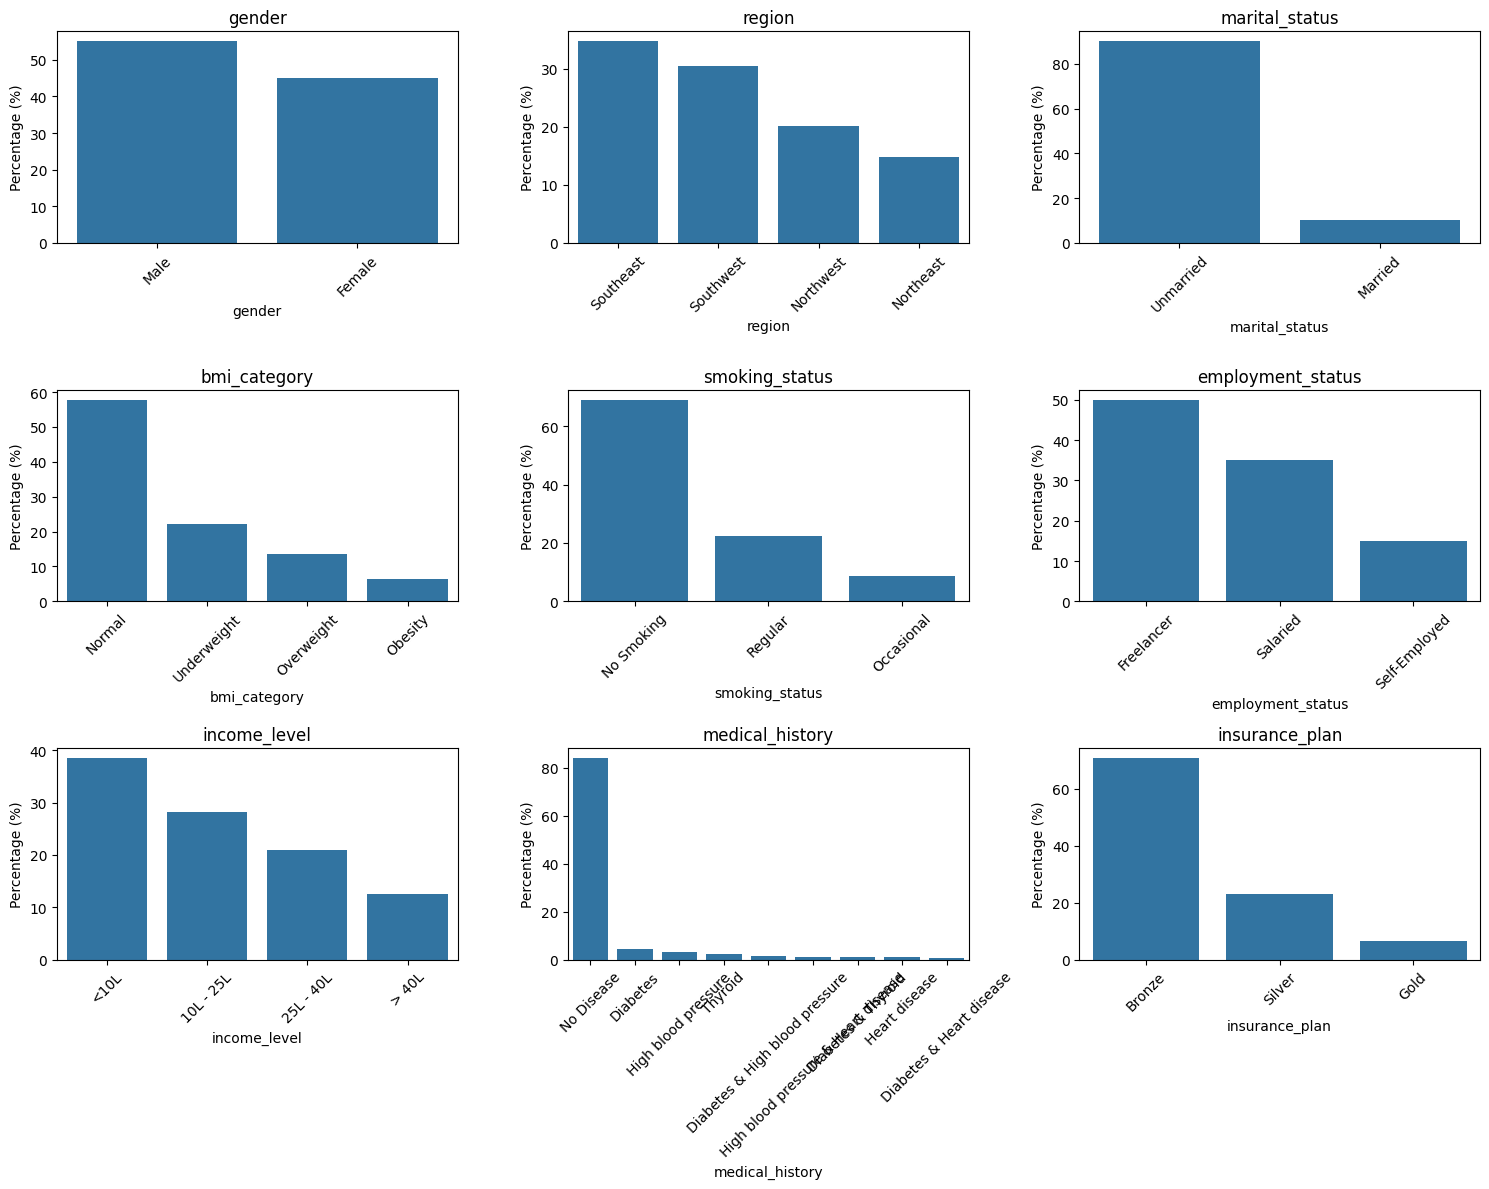

In [29]:
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # ensures enough rows

fig, axes = py.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()  # flatten in case of extra axes

for i, col in enumerate(categorical_columns):
    ax = axes[i]
    pct_count = df2[col].value_counts(normalize=True) * 100
    sns.barplot(x=pct_count.index, y=pct_count.values, ax=ax)
    ax.set_title(col)
    ax.set_ylabel('Percentage (%)')
    ax.set_xlabel(col)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

# Remove any unused subplots
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

py.tight_layout()
py.show()

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L         4508   326     828
25L - 40L         3382   209     608
<10L              6172   404    1145
> 40L              115   366    2023


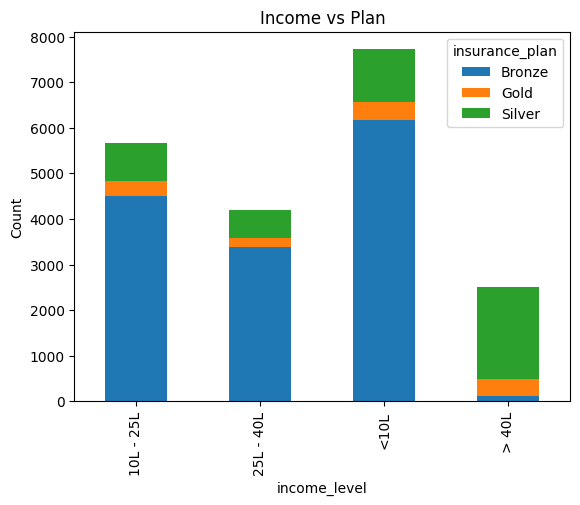

In [30]:
crosstab = pd.crosstab(df2["income_level"],df2["insurance_plan"])
print(crosstab)

crosstab.plot(kind="bar",stacked=True)
py.title("Income vs Plan")
py.ylabel('Count')
py.show()

<Axes: xlabel='insurance_plan', ylabel='income_level'>

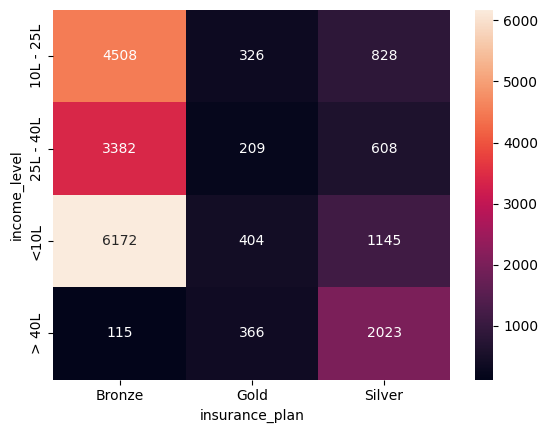

In [31]:
sns.heatmap(crosstab,annot=True,fmt="d")

In [32]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3


In [33]:
df2["medical_history"].unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

In [34]:
risk_scores = {
    "diabetes":6,
    "heart disease":8,
    "high blood pressure":6,
    "thyroid":5,
    "no disease":0,
    "none":0
}

df2[["disease1","disease2"]] = df2["medical_history"].str.split(" & ",expand=True).apply(lambda x:x.str.lower())
df2

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,None
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,None
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4,no disease,None
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2,no disease,None
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1,no disease,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20091,18,Female,Southeast,Unmarried,0,Underweight,No Smoking,Freelancer,> 40L,91,No Disease,Gold,11603,1,no disease,None
20092,23,Female,Northwest,Unmarried,0,Obesity,Occasional,Freelancer,> 40L,57,Diabetes,Gold,14498,2,diabetes,None
20093,24,Female,Northwest,Unmarried,0,Underweight,No Smoking,Self-Employed,25L - 40L,35,No Disease,Bronze,9111,5,no disease,None
20094,21,Male,Northwest,Unmarried,0,Normal,Regular,Freelancer,25L - 40L,32,No Disease,Bronze,8564,4,no disease,None


In [35]:
df2["disease1"].fillna("none",inplace=True)
df2["disease2"].fillna("none",inplace=True)
df2["total_risk_score"] = 0

for disease in ["disease1","disease2"]:
    df2["total_risk_score"] += df2[disease].map(risk_scores)

max_score = df2["total_risk_score"].max()
min_score = df2["total_risk_score"].min()

df2["normalized_risk_score"] = (df2["total_risk_score"]-min_score)/(max_score-min_score)
df2.head(5)

C:\Users\91999\AppData\Local\Temp\ipykernel_26620\2819023519.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2["disease1"].fillna("none",inplace=True)
C:\Users\91999\AppData\Local\Temp\ipykernel_26620\2819023519.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1,no disease,none,0,0.000000


In [36]:
df2.sample(15)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
3208,24,Male,Southeast,Unmarried,2,Normal,No Smoking,Freelancer,10L - 25L,20,No Disease,Bronze,5263,1,no disease,none,0,0.000000
18808,22,Male,Northeast,Unmarried,1,Normal,No Smoking,Freelancer,25L - 40L,31,No Disease,Gold,13022,2,no disease,none,0,0.000000
2745,22,Male,Southwest,Unmarried,0,Overweight,Regular,Freelancer,> 40L,87,No Disease,Silver,12242,4,no disease,none,0,0.000000
10660,23,Male,Southwest,Unmarried,0,Overweight,Regular,Freelancer,<10L,8,No Disease,Bronze,4786,0,no disease,none,0,0.000000
17374,22,Female,Southwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,7,No Disease,Bronze,5708,2,no disease,none,0,0.000000
7362,20,Female,Southwest,Unmarried,0,Overweight,No Smoking,Self-Employed,> 40L,53,High blood pressure,Silver,8721,0,high blood pressure,none,6,0.428571
8482,20,Male,Southeast,Unmarried,1,Normal,No Smoking,Freelancer,<10L,8,No Disease,Silver,12147,5,no disease,none,0,0.000000
5531,19,Male,Southeast,Unmarried,1,Normal,No Smoking,Freelancer,> 40L,48,No Disease,Silver,11133,4,no disease,none,0,0.000000
14183,21,Male,Northeast,Unmarried,1,Normal,Regular,Freelancer,<10L,7,No Disease,Bronze,8253,4,no disease,none,0,0.000000
6791,22,Female,Southeast,Unmarried,1,Normal,No Smoking,Freelancer,10L - 25L,17,Diabetes & High blood pressure,Bronze,10018,5,diabetes,high blood pressure,12,0.857143


In [37]:
df2["insurance_plan"] = df2["insurance_plan"].map({"Bronze":1,"Silver":2,"Gold":3})
df2.insurance_plan.unique()

array([2, 1, 3])

In [38]:
df2.income_level.unique()

array(['> 40L', '<10L', '10L - 25L', '25L - 40L'], dtype=object)

In [39]:
df2["income_level"] = df2["income_level"].map({'<10L':1,'10L - 25L':2,'25L - 40L':3,'> 40L':4})
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,4,99,High blood pressure,2,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,1,3,No Disease,2,11050,3,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,4,97,No Disease,2,11857,4,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,2,15,No Disease,1,5684,2,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,2,14,No Disease,1,5712,1,no disease,none,0,0.000000


In [40]:
nominal_cols = ["gender","region","marital_status","bmi_category","smoking_status","employment_status"]

df3 = pd.get_dummies(df2,columns=nominal_cols,drop_first=True,dtype=int)
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,High blood pressure,2,13365,4,high blood pressure,none,...,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,No Disease,2,11050,3,no disease,none,...,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,No Disease,2,11857,4,no disease,none,...,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,No Disease,1,5684,2,no disease,none,...,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,No Disease,1,5712,1,no disease,none,...,1,0,1,0,1,0,0,0,0,0


In [46]:
df4 = df3.drop(["disease1","disease2","medical_history","total_risk_score"],axis=1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,2,11857,4,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,1,5684,2,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,1,5712,1,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


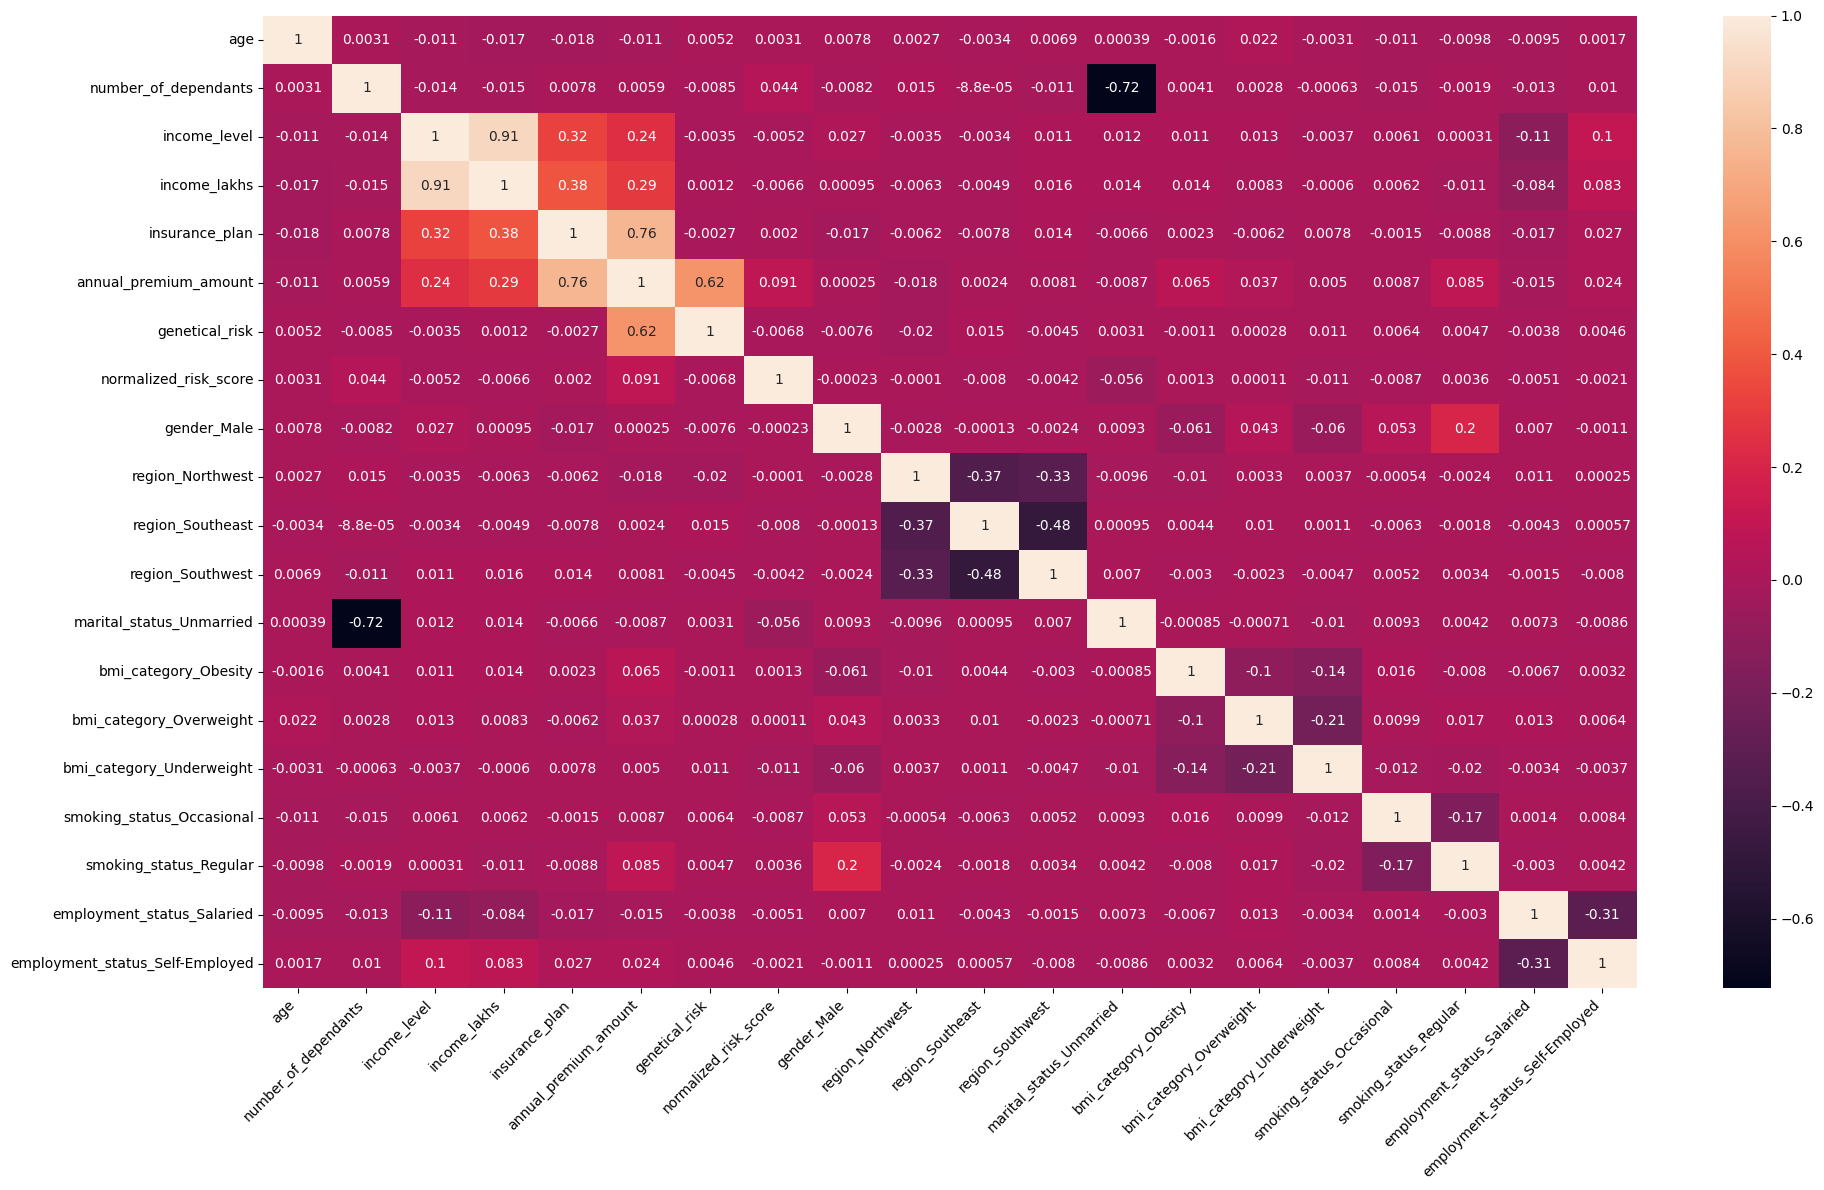

In [47]:
cm = df4.corr()

py.figure(figsize=(20,12))
sns.heatmap(cm,annot=True)
py.xticks(rotation=45,ha="right")
py.yticks(rotation=0)
py.tight_layout()
py.show()

In [48]:
df4.head(2)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0


In [49]:
X = df4.drop("annual_premium_amount",axis=1)
Y = df4["annual_premium_amount"]

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ["age","number_of_dependants","income_level","income_lakhs","insurance_plan","genetical_risk"]
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,0.499211,0.240914,0.357994,0.216064,0.179578,0.500777,0.092076,0.550383,0.201284,0.346958,0.304590,0.899881,0.063527,0.136513,0.222493,0.086379,0.223589,0.350045,0.149955
std,0.327750,0.312413,0.347481,0.219516,0.300051,0.342037,0.230016,0.497467,0.400970,0.476014,0.460245,0.300167,0.243914,0.343341,0.415931,0.280929,0.416660,0.476996,0.357036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.000000,0.050505,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.571429,0.000000,0.333333,0.151515,0.000000,0.600000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.714286,0.333333,0.666667,0.303030,0.500000,0.800000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [51]:
calculate_vif(X)

,Column,VIF
0,age,3.154599
1,number_of_dependants,1.930428
2,income_level,11.928708
3,income_lakhs,11.876413
4,insurance_plan,1.592966
5,genetical_risk,2.981159
6,normalized_risk_score,1.154501
7,gender_Male,2.311831
8,region_Northwest,2.154355
9,region_Southeast,2.990493


In [52]:
calculate_vif(X.drop("income_level",axis=1))

,Column,VIF
0,age,3.153255
1,number_of_dependants,1.927788
2,income_lakhs,2.294155
3,insurance_plan,1.587868
4,genetical_risk,2.981158
5,normalized_risk_score,1.154453
6,gender_Male,2.301658
7,region_Northwest,2.153423
8,region_Southeast,2.989301
9,region_Southwest,2.743932


In [53]:
X_reduced = X.drop("income_level",axis=1)
X.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,1.000000,0.989899,0.5,0.8,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.000000,0.020202,0.5,0.6,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,1.000000,0.969697,0.5,0.8,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.333333,0.141414,0.0,0.4,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.333333,0.131313,0.0,0.2,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


### Model Training

In [54]:
X_train,X_test,Y_train,Y_test = train_test_split(X_reduced,Y,test_size=0.3,random_state=10)

print("x train:",X_train.shape)
print("y test:",X_test.shape)
print("y train:",Y_train.shape)
print("y test:",Y_test.shape)

x train: (14060, 18)
y test: (6026, 18)
y train: (14060,)
y test: (6026,)


In [55]:
model_lr = LinearRegression()
model_lr.fit(X_train,Y_train)
test_score = model_lr.score(X_test,Y_test)
train_score = model_lr.score(X_train,Y_train)
train_score,test_score

(0.988297900194864, 0.9887263253056615)

In [56]:
model_lr.coef_

array([-7.22903185e+00,  1.95361819e+01, -1.26452776e+00,  7.00112526e+03,
        4.99698873e+03,  1.10914836e+03,  8.17798831e+00,  1.67735268e+00,
       -3.27532710e+00,  6.31709531e+00,  1.60689716e+01,  8.12844929e+02,
        4.00375598e+02,  1.07529819e+02,  2.05069661e+02,  6.10983280e+02,
        3.87836470e-02, -5.24201812e+00])

In [57]:
model_lr.intercept_

np.float64(3978.8235284382563)

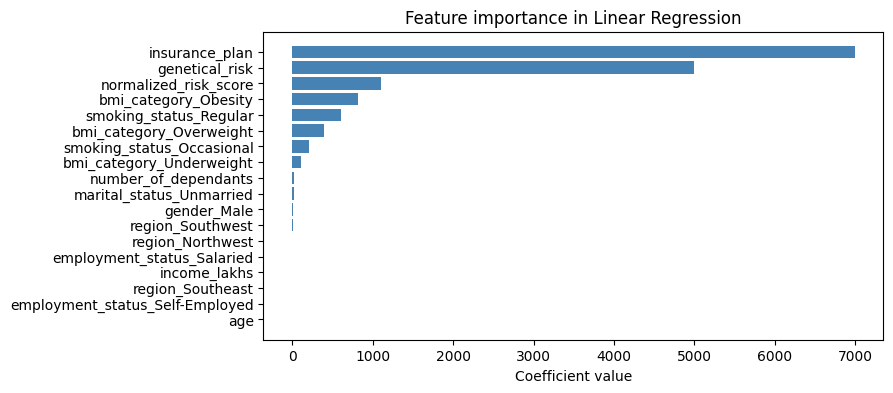

In [58]:
feature_importances = model_lr.coef_

coef_df = pd.DataFrame(feature_importances,index=X_test.columns,columns=["Coefficient"])
coef_df = coef_df.sort_values(by="Coefficient",ascending=True)

py.figure(figsize=(8,4))
py.barh(coef_df.index,coef_df["Coefficient"],color="steelblue")
py.title("Feature importance in Linear Regression")
py.xlabel("Coefficient value")
py.show()


In [59]:
model_ridge = Ridge()
model_ridge.fit(X_train,Y_train)
test_score = model_ridge.score(X_test,Y_test)
train_score = model_ridge.score(X_train,Y_train)
train_score,test_score

(0.9882972960153418, 0.9887275909694276)

In [60]:
model_ridge = Lasso()
model_ridge.fit(X_train,Y_train)
test_score = model_ridge.score(X_test,Y_test)
train_score = model_ridge.score(X_train,Y_train)
train_score,test_score

(0.9882793925177327, 0.9887376057047708)

In [61]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train,Y_train)
test_score = model_xgb.score(X_test,Y_test)
train_score = model_xgb.score(X_train,Y_train)
train_score,test_score

(0.9925054907798767, 0.987729549407959)

In [62]:
best_model = model_lr

### Error Analysis

In [63]:
y_pred = best_model.predict(X_test)

residuals = y_pred-Y_test
residual_pct = residuals*100/Y_test


results_df = pd.DataFrame({
    'actual':Y_test,
    'predicted':y_pred,
    'diff':residuals,
    'diff_pct':residual_pct
})

results_df.head()

,actual,predicted,diff,diff_pct
12774,6238,6121.456891,-116.543109,-1.868277
14758,9462,9601.797510,139.797510,1.477463
13205,5152,5611.056493,459.056493,8.910258
14278,6988,7423.486322,435.486322,6.231916
19351,4917,5112.056543,195.056543,3.966983


<Axes: xlabel='diff_pct', ylabel='Count'>

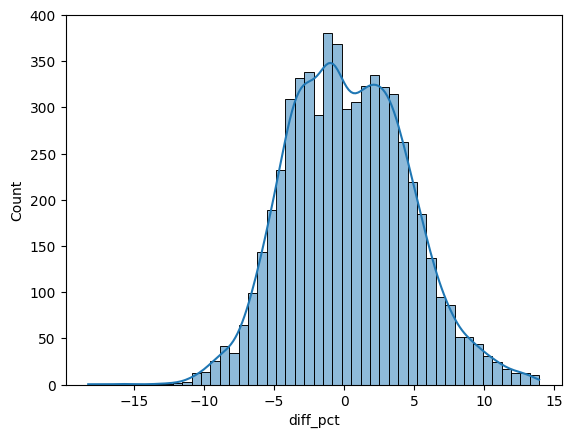

In [64]:
sns.histplot(results_df["diff_pct"],kde=True)

In [65]:
extreme_error_threshold = 10
extreme_result_df = results_df[np.abs(results_df.diff_pct)>extreme_error_threshold]

In [66]:
extreme_result_df.shape

(129, 4)

In [67]:
extreme_error_pct = extreme_result_df.shape[0]*100/results_df.shape[0]
extreme_error_pct

2.140723531364089

In [68]:
extreme_result_df.index

Index([12669,  2918, 17084,  7181, 12285, 13476, 15481,  2948,  4919, 15170,
       ...
       15166, 19580, 15664,  4204,  8692,  1986,  8008,  9714,  7357,  1534],
      dtype='int64', length=129)

In [69]:
extreme_errors_df = X_test.loc[extreme_result_df.index]
extreme_errors_df

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
12669,0.857143,0.000000,0.000000,0.0,0.0,0.000000,1,0,1,0,1,0,1,0,0,0,1,0
2918,0.285714,0.000000,0.151515,0.0,0.2,0.000000,1,1,0,0,1,0,0,0,0,0,1,0
17084,1.000000,0.000000,0.353535,0.0,0.0,0.000000,1,0,0,0,1,0,0,0,0,0,0,0
7181,0.571429,0.000000,0.161616,0.0,0.0,0.000000,1,0,0,1,1,0,0,0,0,0,0,0
12285,0.428571,0.333333,0.232323,0.0,0.0,0.000000,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,0.000000,0.000000,0.161616,0.0,0.2,0.000000,0,0,1,0,1,0,0,1,0,0,0,0
8008,0.285714,0.000000,0.242424,0.0,0.2,0.000000,1,1,0,0,1,0,1,0,0,0,0,0
9714,0.142857,0.000000,0.313131,0.0,0.0,0.000000,1,0,0,0,1,0,0,0,0,0,1,0
7357,1.000000,0.666667,0.000000,0.0,0.6,0.571429,1,1,0,0,1,0,0,0,0,0,0,0


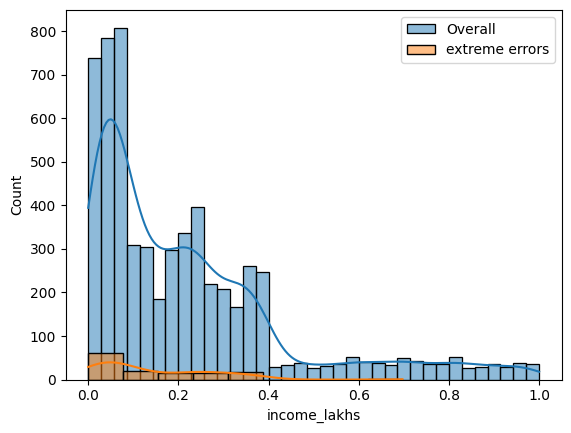

In [70]:
sns.histplot(X_test.income_lakhs,label="Overall",kde=True)
sns.histplot(extreme_errors_df.income_lakhs,label="extreme errors",kde=True)
py.legend()
py.show()

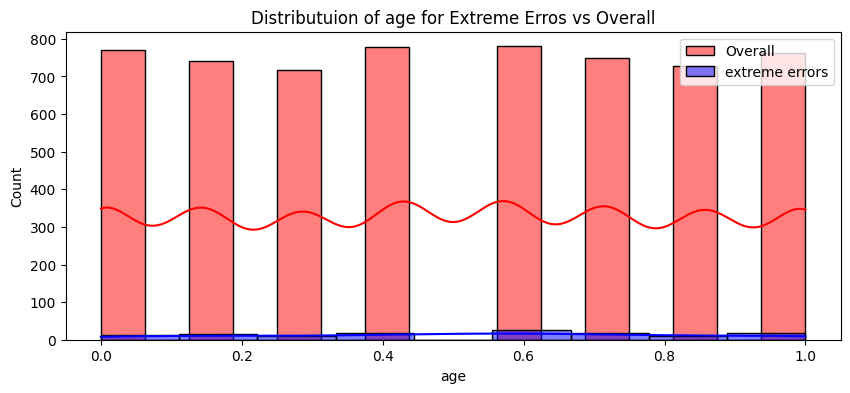

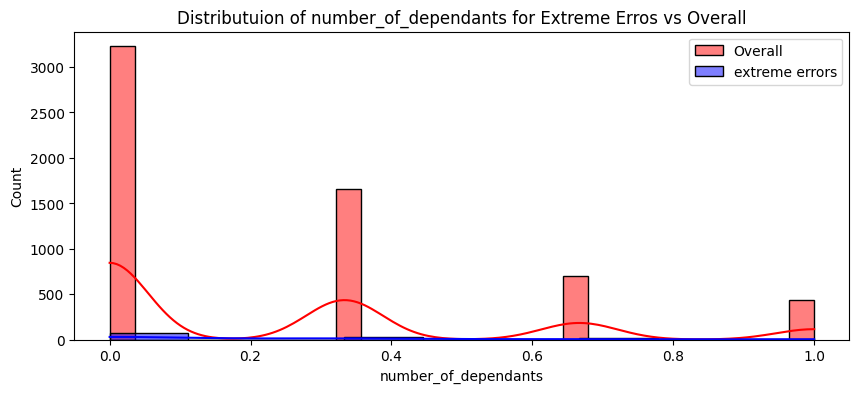

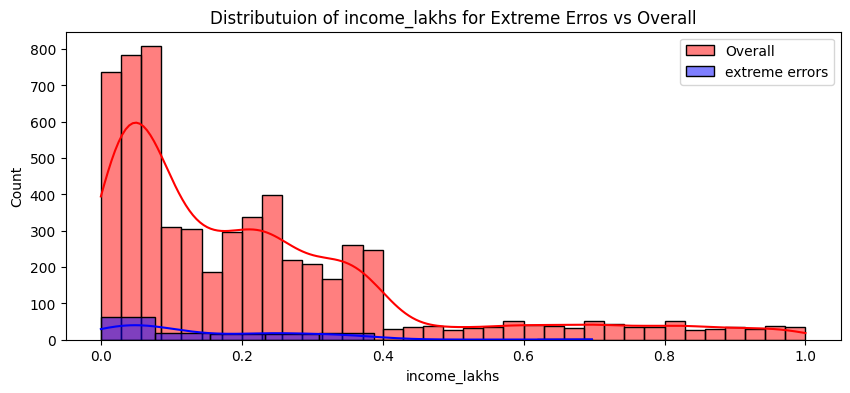

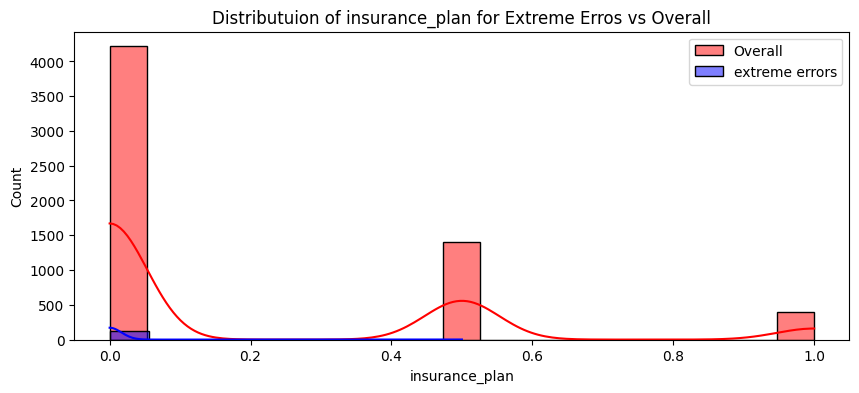

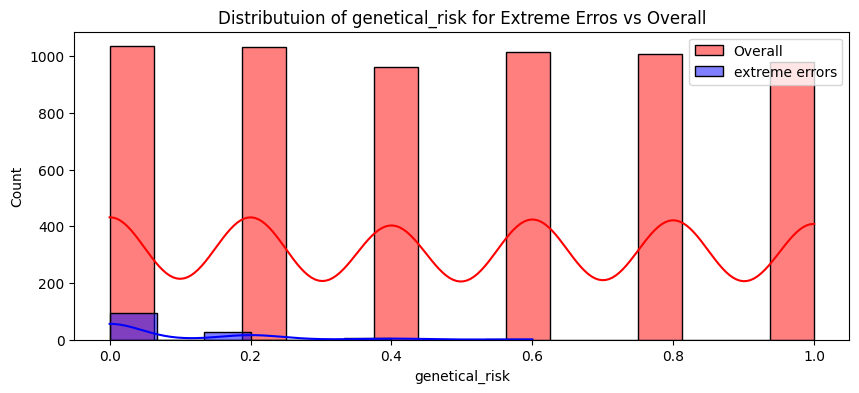

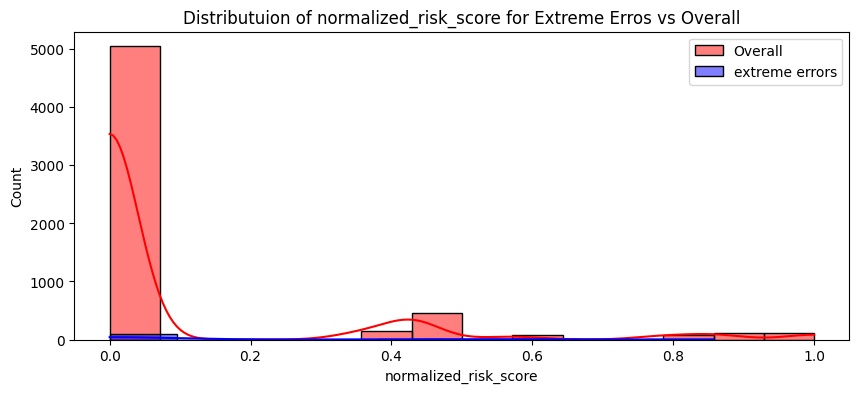

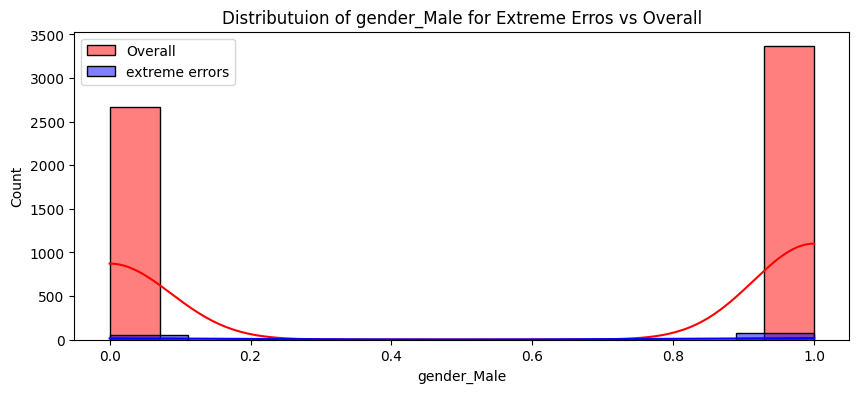

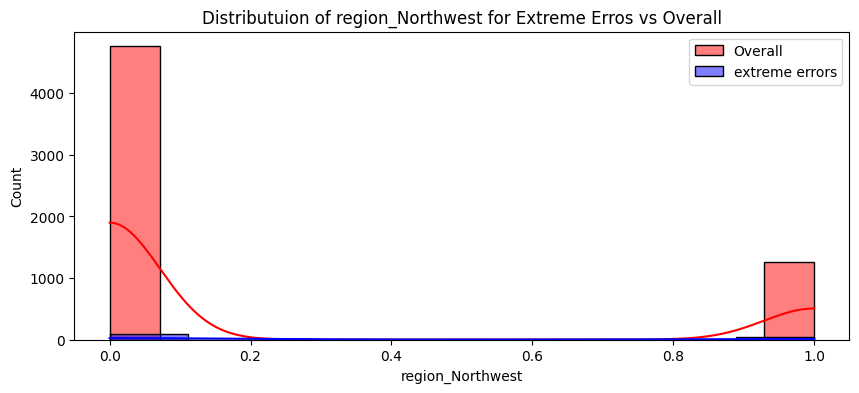

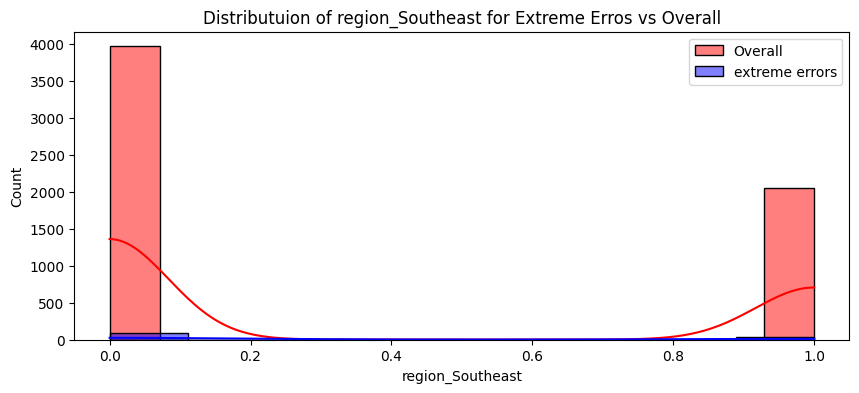

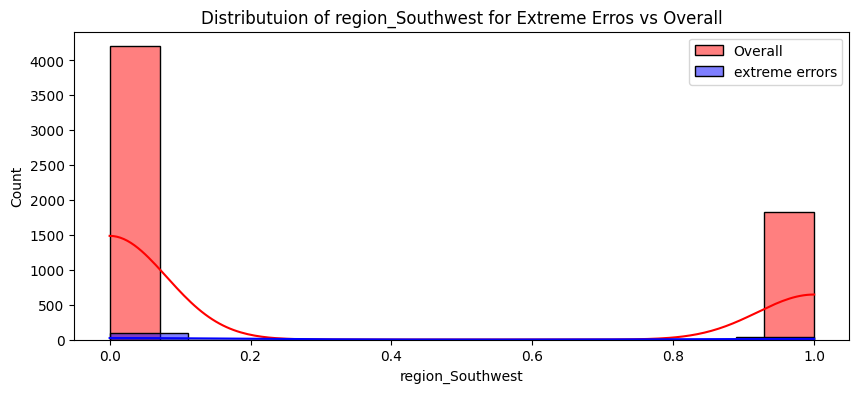

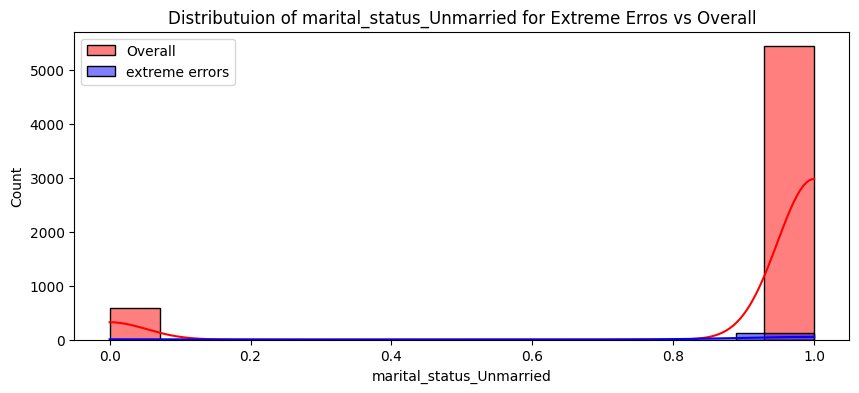

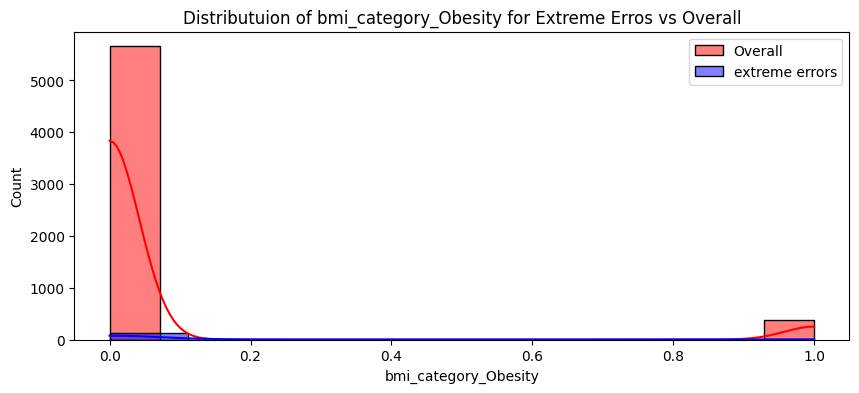

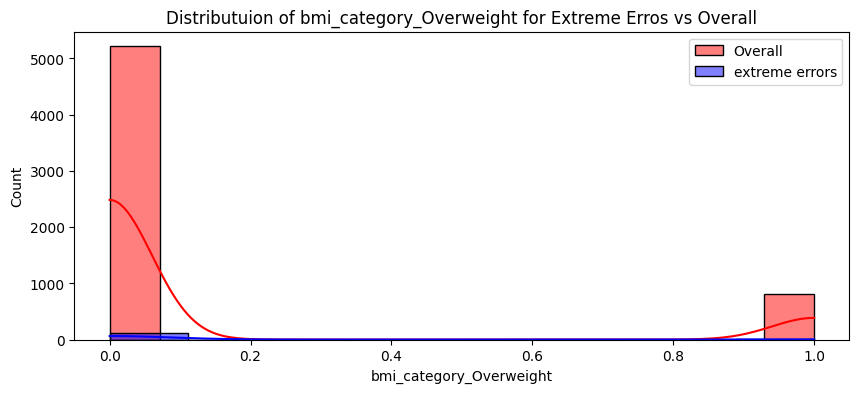

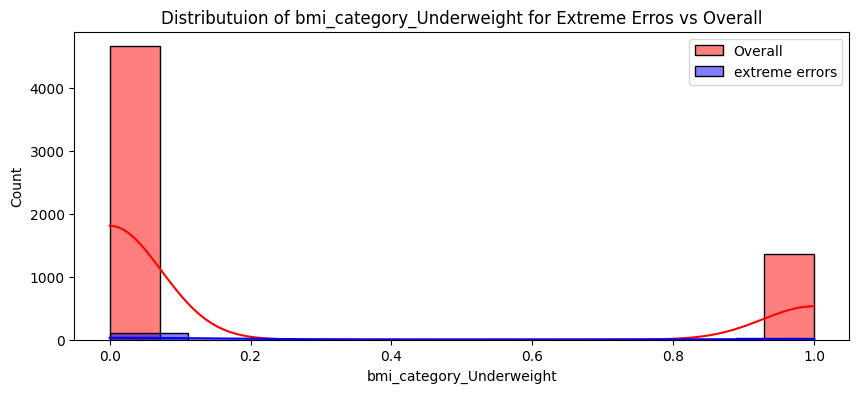

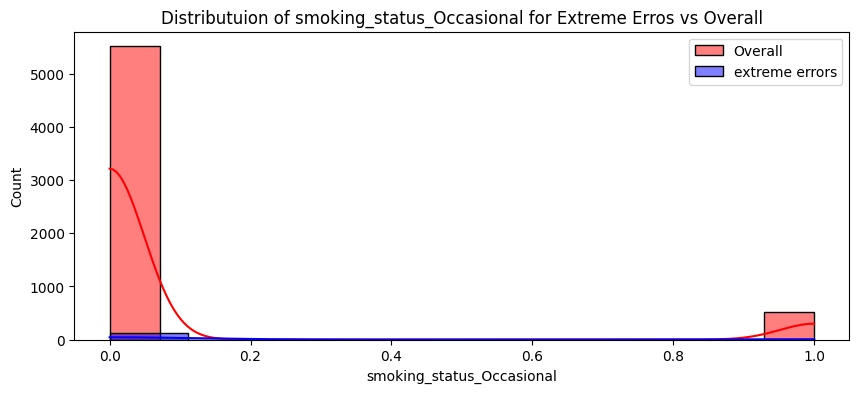

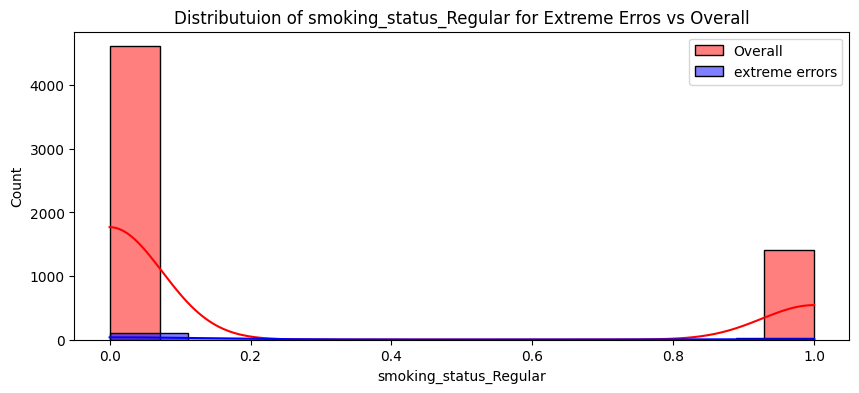

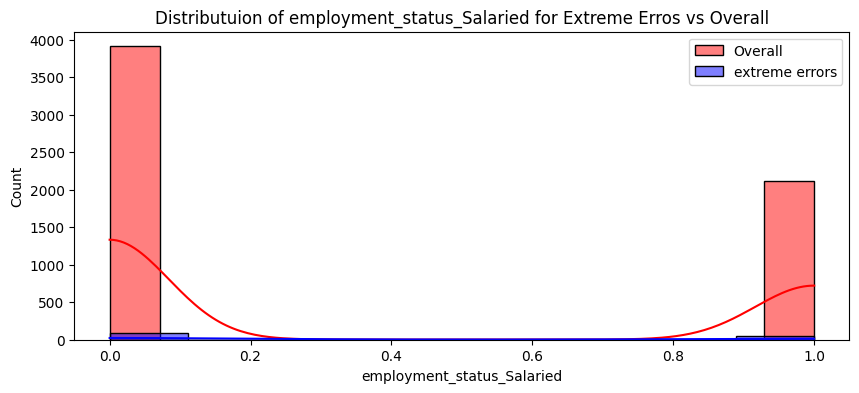

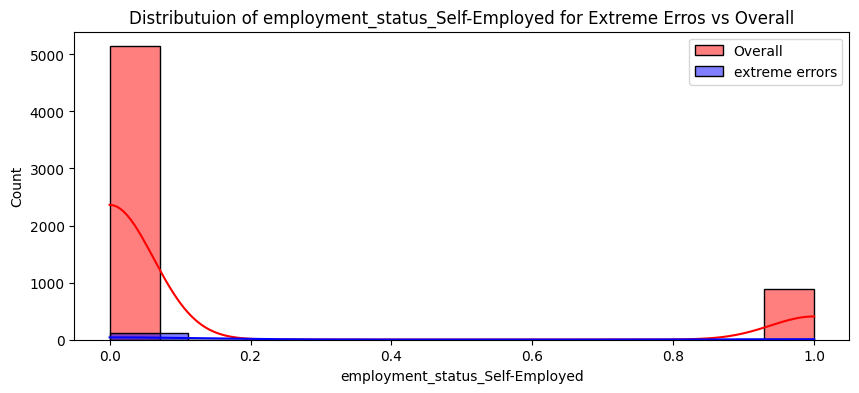

In [71]:
for feature in X_test.columns:
    py.figure(figsize=(10,4))
    sns.histplot(X_test[feature],label="Overall",color="red",kde=True)
    sns.histplot(extreme_errors_df[feature],color="blue",label="extreme errors",kde=True)
    py.legend()
    py.title(f"Distributuion of {feature} for Extreme Erros vs Overall")
    py.show()

<Axes: xlabel='age', ylabel='Count'>

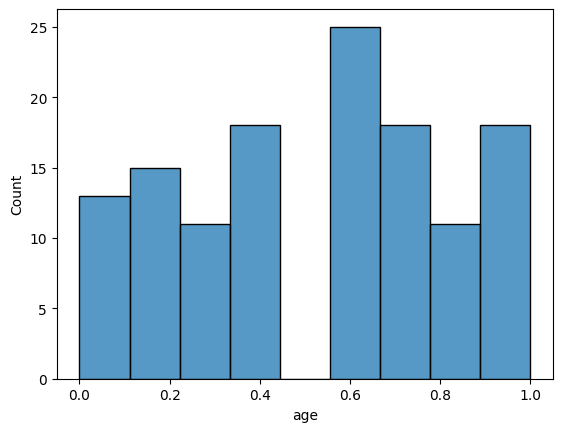

In [72]:
sns.histplot(extreme_errors_df.age)

In [73]:
extreme_errors_df["income_level"]=-1

<Axes: xlabel='age', ylabel='Count'>

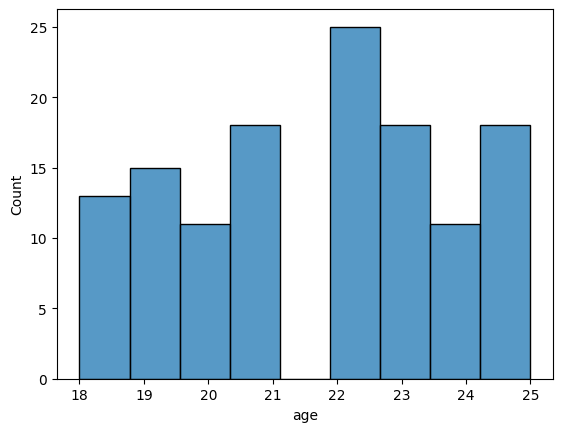

In [74]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = age_original = scaler.inverse_transform(extreme_errors_df[cols_to_scale])
sns.histplot(df_reversed["age"])

In [75]:
df_reversed.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk
count,129.000000,129.000000,129.0,129.000000,129.000000,129.000000
mean,21.666667,0.651163,-2.0,14.953488,1.007752,0.325581
std,2.191366,0.915587,0.0,12.601377,0.088045,0.601597
min,18.000000,0.000000,-2.0,1.000000,1.000000,0.000000
25%,20.000000,0.000000,-2.0,5.000000,1.000000,0.000000
50%,22.000000,0.000000,-2.0,9.000000,1.000000,0.000000
75%,23.000000,1.000000,-2.0,25.000000,1.000000,1.000000
max,25.000000,3.000000,-2.0,70.000000,2.000000,3.000000


### Export the Model

In [77]:
from joblib import dump

dump(best_model,"artifacts/model_young.joblib")
scaler_with_cols ={
    'scaler':scaler,
    'cols_to_scale':cols_to_scale
}

dump(scaler_with_cols,"artifacts/scaler_young.joblib")

['artifacts/scaler_young.joblib']